In [3]:
import tensorflow as tf

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.16.1


In [7]:
fashion_mnist = tf.keras.datasets.fashion_mnist

# 훈련 세트와 테스트 세트 로드
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 5s 1us/step


In [9]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [10]:
train_images.shape

(60000, 28, 28)

In [12]:
len(train_labels)

60000

In [13]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [14]:
test_images.shape

(10000, 28, 28)

In [17]:
len(test_labels)

10000

In [ ]:
# 데이터 전처리
# 훈련 세트의 이미지 데이터를 보면 픽셀 값의 범위가 0 ~ 255 사이

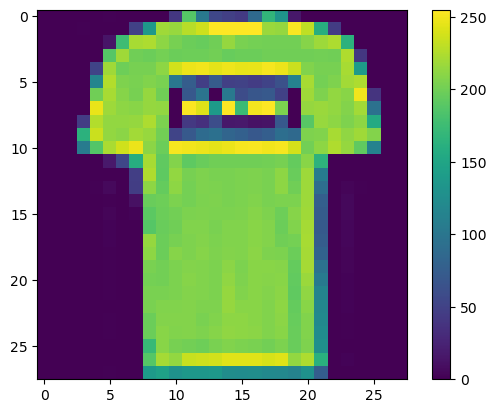

In [18]:
plt.figure()
plt.imshow(train_images[1])
plt.colorbar()
plt.grid(False)
plt.show()

In [19]:
# 신경망 모델에 주입하기 전에, 이 값의 범위를 0 ~ 1 사이로 조정한다.
# 이때 훈련 세트와 테스트 세트에 동일한 방식으로 전처리를 한다.
train_images = train_images / 255.0
test_images = test_images / 255.0

In [20]:
train_images[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

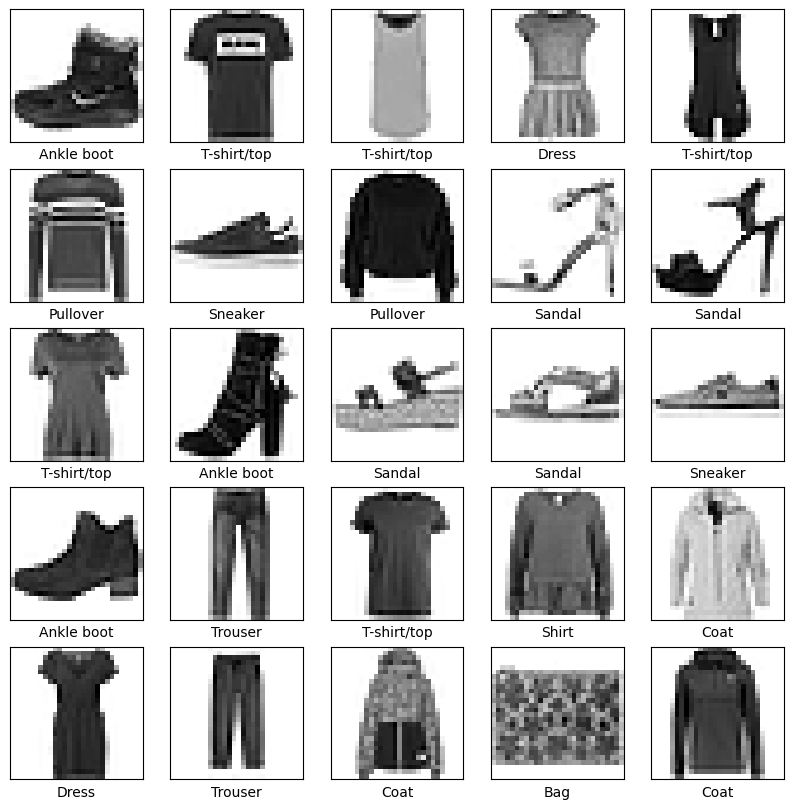

In [22]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [23]:
# 모델 구성
# 레이어 설정

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),   # 28*28 픽셀의 이미지 포맷을 784(28*28)의 1차원 배열로 변환
    tf.keras.layers.Dense(128, activation='relu'),  # 2개의 Dense 층이 연속으로 연결됨, (1) 128개의 노드를 가짐
    tf.keras.layers.Dense(10, activation='softmax') # 10개의 노드의 softmax 층, 10개의 확률을 반환하고 반환된 값의 전체 합은 1이다.
])

z:\ProgramData\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [26]:
# 모델 컴파일
# 모델 훈련 전, 컴파일 단계에 몇 가지 설정을 추가한다.
# - 손실 함수: 모델의 정확도 측정
# - 옵티마이저: 모델이 업데이트되는 방식
# - 메트릭: 훈련/테스트 단계를 모니터링하는데 사용된다.

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [27]:
# 모델 훈련
# 1. 훈련 데이터 주입
# 2. 이미지와 레이블 매핑하는 방법 학습
# 3. 테스트 세트에 대한 모델의 예측 생성
# 4. 예측이 test_labels 배열의 레이블과 일치하는지 확인

model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7839 - loss: 0.6250   
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8633 - loss: 0.3820
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 988us/step - accuracy: 0.8746 - loss: 0.3451
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 998us/step - accuracy: 0.8860 - loss: 0.3110
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 990us/step - accuracy: 0.8919 - loss: 0.2931
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 985us/step - accuracy: 0.8983 - loss: 0.2751
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 973us/step - accuracy: 0.9021 - loss: 0.2639
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 982us/step - accuracy: 0.9095 - loss: 0.2496
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9086 - loss: 0.2477
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 976us/step - accuracy: 0.9124 - loss: 0.2356


In [28]:
# 정확도 평가

test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

313/313 - 0s - 1ms/step - accuracy: 0.8735 - loss: 0.3639

Test accuracy: 0.8734999895095825


In [29]:
# 예측하기

probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [30]:
predictions = probability_model.predict(test_images)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 952us/step


In [31]:
predictions[0]

array([4.6491195e-07, 1.0787250e-10, 1.9802764e-09, 3.1215613e-10,
       4.1125187e-08, 1.5509500e-04, 7.7899527e-09, 1.4932633e-02,
       2.1423427e-08, 9.8491168e-01], dtype=float32)

In [32]:
np.argmax(predictions[0])

9

In [33]:
test_labels[0]

9

In [34]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

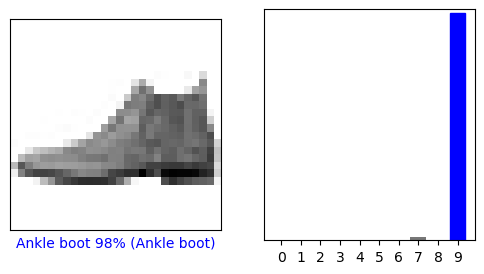

In [35]:
# 예측 확인

i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

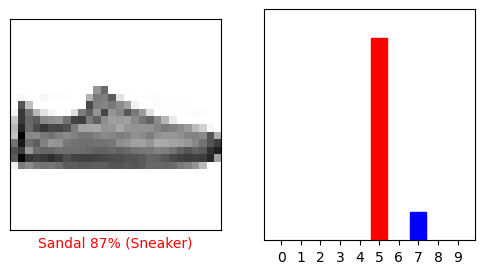

In [36]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

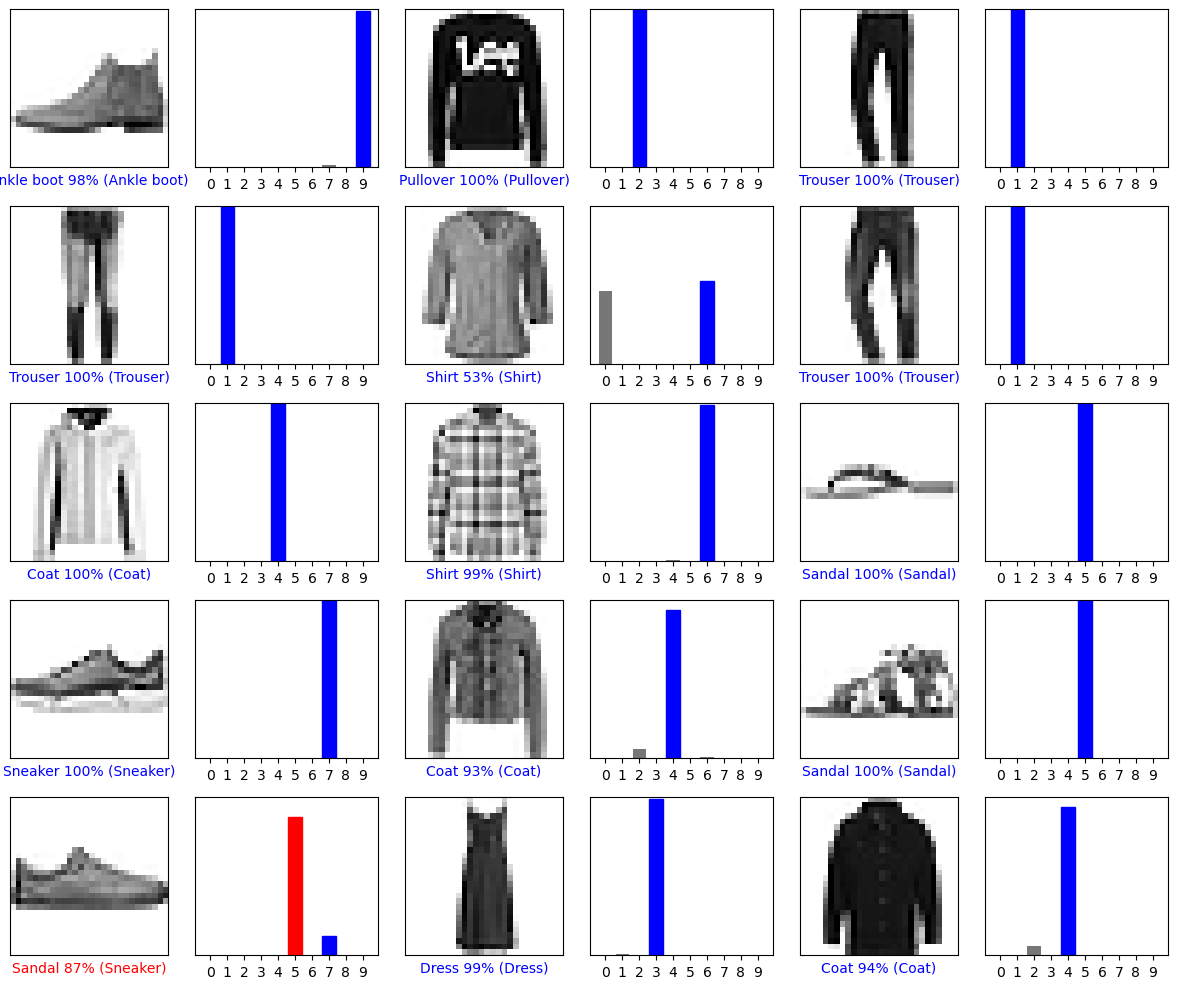

In [37]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()